#Importando as bibliotecas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importando dataset

In [2]:
ds = np.loadtxt('Coffee-Shop-Sales.csv', delimiter=',', dtype=str, encoding='utf-8')
print(ds[0, :])
# Remove aspas duplas
ds = np.char.strip(ds, '"')

['"transaction_id"' '"transaction_date"' '"transaction_time"'
 '"transaction_qty"' '"store_id"' '"store_location"' '"product_id"'
 '"unit_price"' '"product_category"' '"product_type"' '"product_detail"']


In [3]:
df = pd.read_csv('Coffee-Shop-Sales.csv')

#1 - Como as vendas de produtos de bakery (Bakery) se comparam com as de coffee (Coffee) em termos de quantidade?

Total de produtos vendidos (em quantidade):
Bakery: 23214.0
Coffee: 91078.0


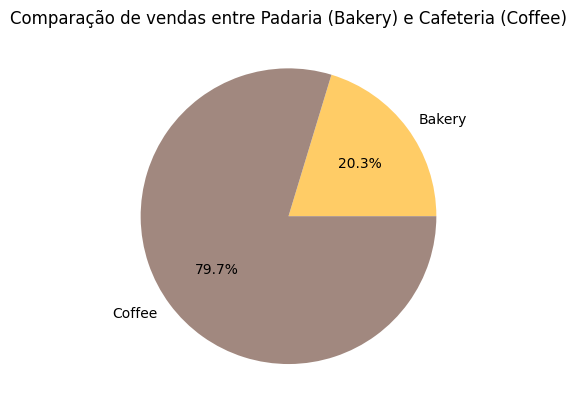

In [27]:
# SLICING DAS COLUNAS
transaction_qty = ds[1:, 3].astype(float)
product_category = ds[1:, 8]

# Criar máscaras booleanas para cada categoria
mask_bakery = np.char.find(product_category, 'Bakery') >= 0
mask_coffee = np.char.find(product_category, 'Coffee') >= 0

# Calcular o total de quantidades vendidas para cada uma
total_bakery = transaction_qty[mask_bakery].sum()
total_coffee = transaction_qty[mask_coffee].sum()

# Exibir resultados
print('Total de produtos vendidos (em quantidade):')
print('Bakery:', total_bakery)
print('Coffee:', total_coffee)

#Gráfico de pizza
plt.pie(
    x=[total_bakery, total_coffee],
    labels=['Bakery', 'Coffee'],
    autopct='%1.1f%%',
    colors=['#ffcc66', '#a1887f']
)
plt.title("Comparação de vendas entre Padaria (Bakery) e Cafeteria (Coffee)")
plt.show()


#2 - Qual tipo de chá é mais popular?

Tipo de chá mais popular: Brewed Chai tea


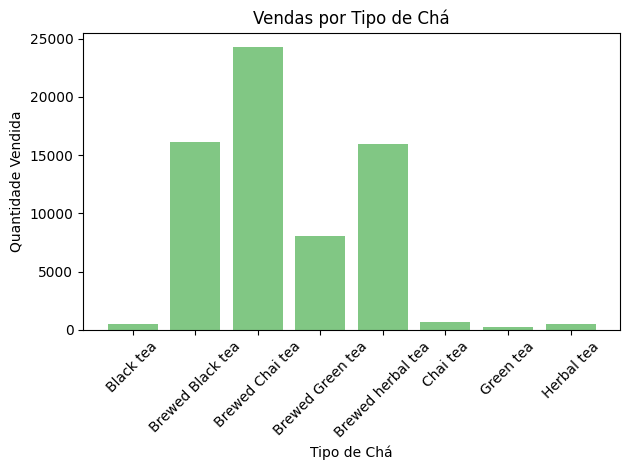

In [21]:
# SLICING DAS COLUNAS
product_category = ds[:, 8]
product_type = ds[:, 9]

# Garantir que todos os arrays têm o mesmo tamanho
min_size = min(len(product_category), len(transaction_qty))

# Ajustar todos os arrays para o mesmo tamanho
product_category = product_category[:min_size]
product_type = product_type[:min_size]
transaction_qty = transaction_qty[:min_size]

# FILTRANDO APENAS OS PRODUTOS DE CHÁ
mask_tea = np.char.find(product_category, 'Tea') >= 0
tea_types = product_type[mask_tea]
tea_qty = transaction_qty[mask_tea]

# AGRUPANDO POR TIPO DE CHÁ
tipos_unicos, indices, contagem = np.unique(tea_types, return_inverse=True, return_counts=True)

# Soma total de quantidades vendidas por tipo
vendas_por_tipo = np.zeros(len(tipos_unicos))
for i in range(len(tea_qty)):
    vendas_por_tipo[indices[i]] += tea_qty[i]

mais_vendido = tipos_unicos[np.argmax(vendas_por_tipo)]
print("Tipo de chá mais popular:", mais_vendido)

plt.bar(tipos_unicos, vendas_por_tipo, color='#81c784')
plt.title('Vendas por Tipo de Chá')
plt.xlabel('Tipo de Chá')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3 - Quais são as categorias de produtos mais vendidas?

Top 5 Categorias mais vendidas:
Coffee: 89250.0 unidades vendidas
Tea: 69737.0 unidades vendidas
Bakery: 23214.0 unidades vendidas
Drinking Chocolate: 17457.0 unidades vendidas
Flavours: 10511.0 unidades vendidas


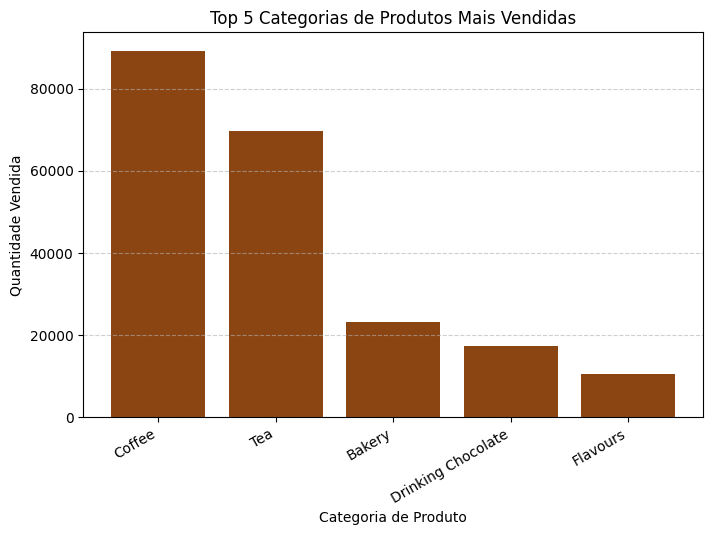

In [20]:
categorias = ds[1:, 8]          # coluna de categorias
quantidades = ds[1:, 3].astype(float)  # coluna de quantidades

# Obter categorias únicas e somar as quantidades por categoria
categorias_unicas = np.unique(categorias)
vendas_totais = []

for cat in categorias_unicas:
    soma = quantidades[categorias == cat].sum()
    vendas_totais.append(soma)

vendas_totais = np.array(vendas_totais)

# Encontrar as 5 mais vendidas
indices_top5 = np.argsort(vendas_totais)[::-1][:5]  # ordena decrescente
top_categorias = categorias_unicas[indices_top5]
top_vendas = vendas_totais[indices_top5]

print("Top 5 Categorias mais vendidas:")
for c, v in zip(top_categorias, top_vendas):
    print(f"{c}: {v} unidades vendidas")

plt.figure(figsize=(8,5))
plt.bar(top_categorias, top_vendas, color='saddlebrown')
plt.title('Top 5 Categorias de Produtos Mais Vendidas')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30, ha='right')
plt.show()

#4 - Quais produtos apresentaram o maior aumento percentual em número de vendas mensais ao longo de 2023?

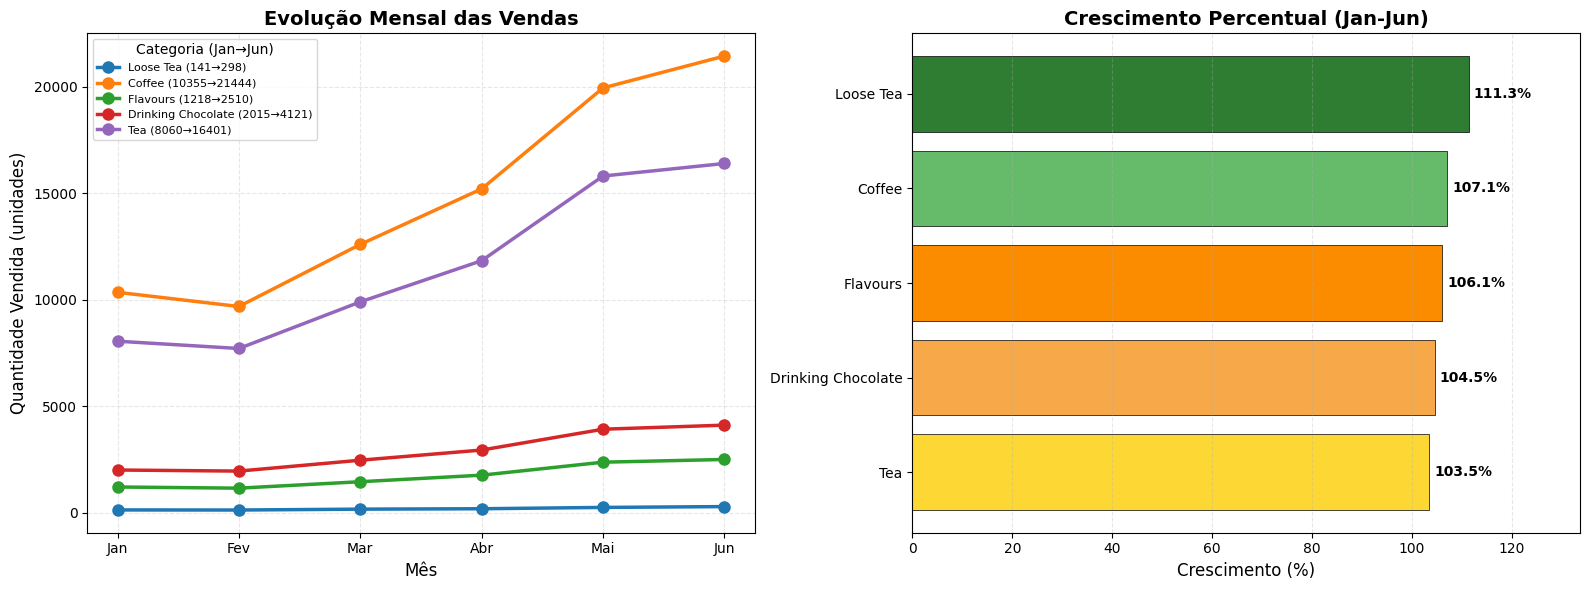

In [23]:
df['mes'] = pd.to_datetime(df['transaction_date']).dt.month

vendas_mensais = df.groupby(['product_category', 'mes'])['transaction_qty'].sum().unstack(fill_value=0)
vendas_mensais['aumento_%'] = (vendas_mensais[6] - vendas_mensais[1]) / vendas_mensais[1] * 100
top5 = vendas_mensais['aumento_%'].nlargest(5).index

meses_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']

# Cores para o gráfico de barras (ranking de crescimento)
cores_barras_ranking = {0: '#2E7D32',  1: '#66BB6A', 2: '#FB8C00',  3: "#F7A848",  4: '#FDD835'}

plt.figure(figsize=(16, 6))

# Gráfico 1: Evolução mensal das vendas
plt.subplot(1, 2, 1)

for categoria in top5:
    valores = vendas_mensais.loc[categoria].iloc[:-1]
    plt.plot(vendas_mensais.columns[:-1], valores, marker='o', linewidth=2.5, markersize=8,
             label=f'{categoria} ({int(valores.iloc[0])}→{int(valores.iloc[-1])})')

plt.title('Evolução Mensal das Vendas', fontweight='bold', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade Vendida (unidades)', fontsize=12)
plt.xticks(range(1, 7), meses_labels)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Categoria (Jan→Jun)', fontsize=8, loc='upper left')

# Gráfico 2: Aumento percentual
plt.subplot(1, 2, 2)

percentuais = vendas_mensais.loc[top5, 'aumento_%'].sort_values()
cores_barras = [cores_barras_ranking[list(top5).index(cat)] for cat in percentuais.index]

plt.barh(range(len(percentuais)), percentuais.values, color=cores_barras, edgecolor='black', linewidth=0.5)
plt.yticks(range(len(percentuais)), percentuais.index, fontsize=10)
plt.title('Crescimento Percentual (Jan-Jun)', fontweight='bold', fontsize=14)
plt.xlabel('Crescimento (%)', fontsize=12)
plt.xlim(0, percentuais.max() * 1.2)
plt.grid(axis='x', linestyle='--', alpha=0.3)

for i, valor in enumerate(percentuais.values):
    plt.text(valor + 1, i, f'{valor:.1f}%', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

#5 - Em cada região, qual produto registrou o maior faturamento?

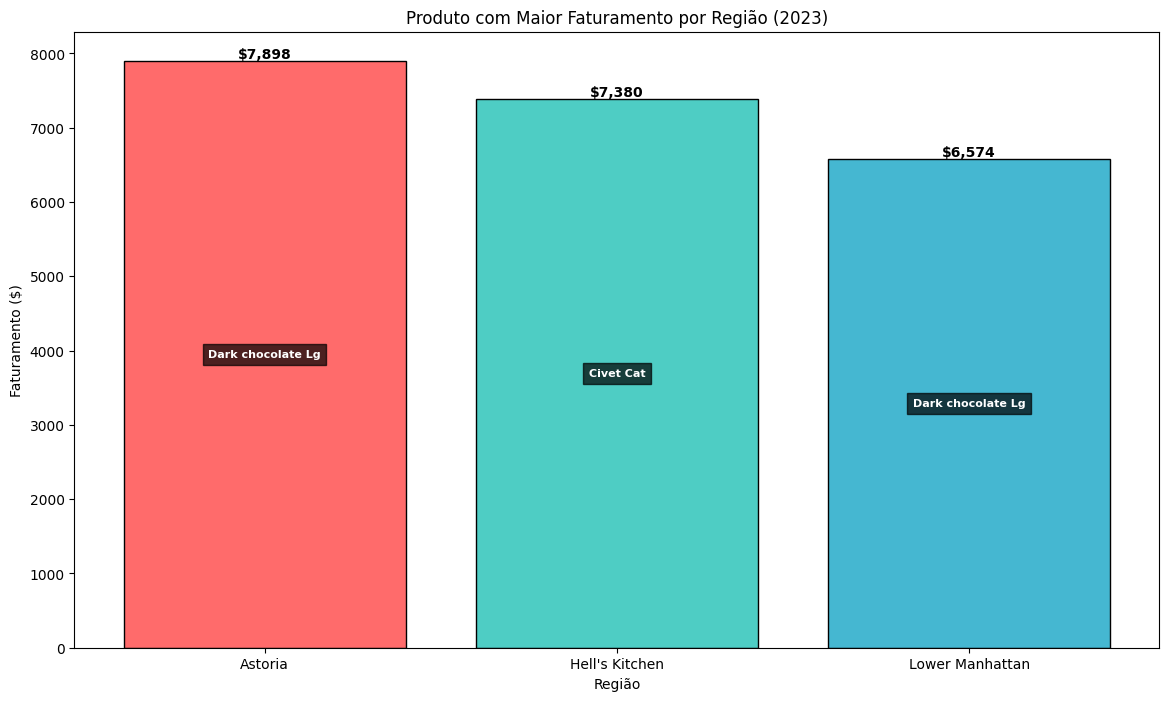

In [24]:
df['faturamento'] = df['transaction_qty'] * df['unit_price']

top = df.groupby(['store_location', 'product_detail'])['faturamento'].sum()
idx = top.groupby('store_location').idxmax()
top = top.loc[idx].reset_index()

plt.figure(figsize=(14, 8))
bars = plt.bar(top['store_location'], top['faturamento'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black')

for bar, (_, row) in zip(bars, top.iterrows()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'${row["faturamento"]:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(bar.get_x() + bar.get_width()/2, height/2, row['product_detail'][:25], ha='center', va='center', fontsize=8, color='white', fontweight='bold', bbox=dict(facecolor='black', alpha=0.7))

plt.title('Produto com Maior Faturamento por Região (2023)')
plt.xlabel('Região')
plt.ylabel('Faturamento ($)')
plt.show()

#6- Quais produtos geram o maior faturamento total ao longo de 2023?

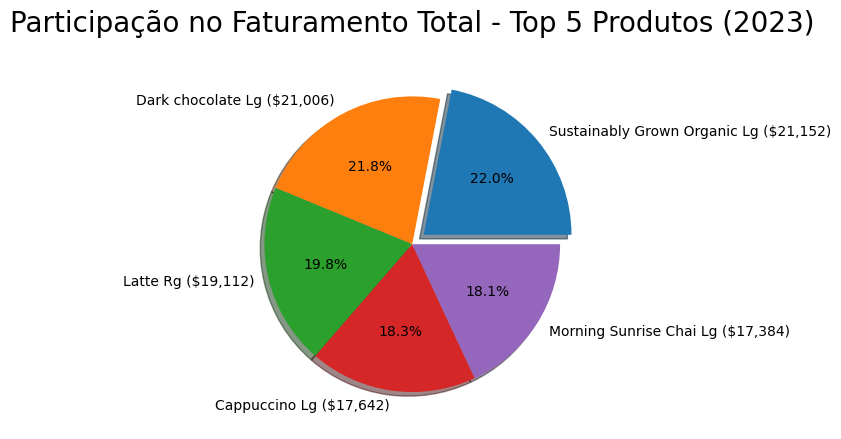

In [25]:
df['faturamento'] = df['transaction_qty'] * df['unit_price']

top5 = df.groupby('product_detail')['faturamento'].sum().nlargest(5)

plt.pie(top5.values,labels=[f"{p} (${v:,.0f})" for p, v in zip(top5.index, top5.values)],autopct='%1.1f%%',explode=[0.1] + [0]*(len(top5)-1),shadow=True)
plt.title('Participação no Faturamento Total - Top 5 Produtos (2023)', fontsize=20, pad=20)
plt.show()

#7 - Vendas de tipo de café por estação


Sazonalidade dos Cafés:

Verão:
             product_type  transaction_qty
12  Gourmet brewed coffee             5855
10       Barista Espresso             5608
13  Organic brewed coffee             2986

Outono:
            product_type  transaction_qty
7  Gourmet brewed coffee            13771
5       Barista Espresso            13370
8  Organic brewed coffee             6989

Inverno:
            product_type  transaction_qty
2  Gourmet brewed coffee             6347
0       Barista Espresso             5965
1            Drip coffee             3134


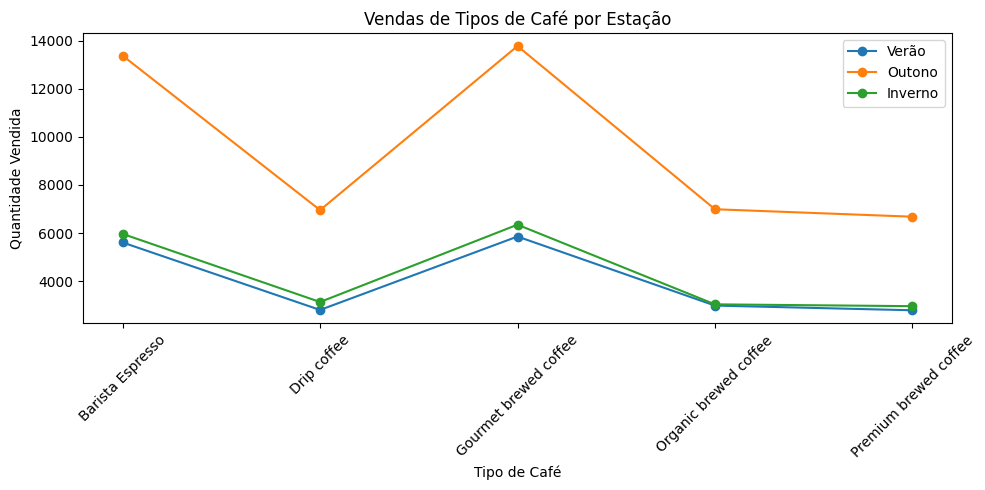

In [7]:
df["datetime"] = pd.to_datetime(df["transaction_date"].astype(str) + " " + df["transaction_time"].astype(str))

df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.dayofweek  # 0=Segunda, 6=Domingo

# Definir a estação do ano
def get_season(month):
    if month in [12, 1, 2]:
        return "Verão"
    elif month in [3, 4, 5]:
        return "Outono"
    elif month in [6, 7, 8]:
        return "Inverno"
    else:
        return "Primavera"

df["season"] = df["month"].apply(get_season)

# -1- Sazonalidades do café
season_sales = df[df["product_category"] == "Coffee"].groupby(["season", "product_type"])["transaction_qty"].sum().reset_index()
top_season_sales = season_sales.sort_values(["season", "transaction_qty"], ascending=[True, False])

print("\nSazonalidade dos Cafés:")
for s in df["season"].unique():
    temp = top_season_sales[top_season_sales["season"] == s].head(3)
    print(f"\n{s}:")
    print(temp[["product_type", "transaction_qty"]])

plt.figure(figsize=(10,5))
for s in df["season"].unique():
    temp = season_sales[season_sales["season"] == s]
    plt.plot(temp["product_type"], temp["transaction_qty"], marker='o', label=s)
plt.title("Vendas de Tipos de Café por Estação")
plt.xlabel("Tipo de Café")
plt.ylabel("Quantidade Vendida")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8 - Horarios de picos backery e coffee


Horários de Ouro:
Café - Pico: 10 h
Padaria - Pico: 10 h


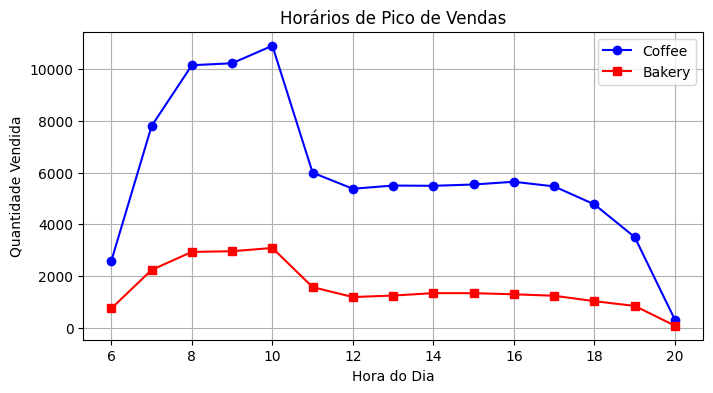

In [8]:
hour_sales = df.groupby(["hour", "product_category"])["transaction_qty"].sum().reset_index()
coffee_sales = hour_sales[hour_sales["product_category"] == "Coffee"]
bakery_sales = hour_sales[hour_sales["product_category"] == "Bakery"]

print("\nHorários de Ouro:")
print("Café - Pico:", coffee_sales.loc[coffee_sales["transaction_qty"].idxmax(), "hour"], "h")
print("Padaria - Pico:", bakery_sales.loc[bakery_sales["transaction_qty"].idxmax(), "hour"], "h")

plt.figure(figsize=(8,4))
plt.plot(coffee_sales["hour"], coffee_sales["transaction_qty"], 'o-b', label="Coffee")
plt.plot(bakery_sales["hour"], bakery_sales["transaction_qty"], 's-r', label="Bakery")
plt.title("Horários de Pico de Vendas")
plt.xlabel("Hora do Dia")
plt.ylabel("Quantidade Vendida")
plt.legend()
plt.grid(True)
plt.show()

# 9 - Os 5 produtos menos vendidos


Os 5 produtos menos vendidos:
product_detail
Dark chocolate                  118
Spicy Eye Opener Chai           122
Guatemalan Sustainably Grown    134
Earl Grey                       142
Jamacian Coffee River           146
Name: transaction_qty, dtype: int64


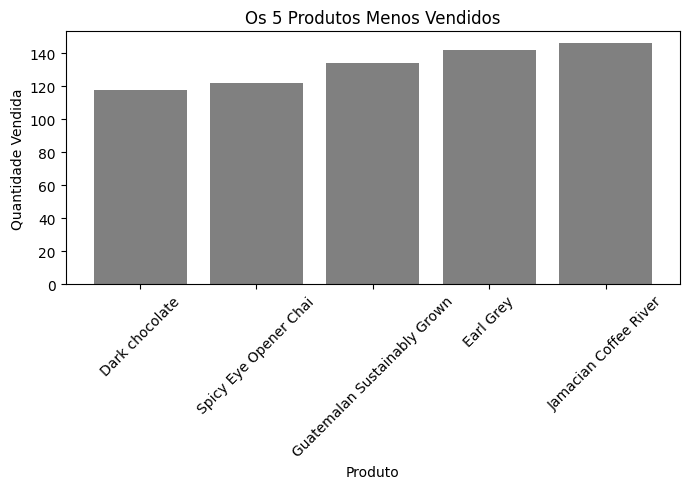

In [9]:
least_sold = df.groupby("product_detail")["transaction_qty"].sum().nsmallest(5)
print("\nOs 5 produtos menos vendidos:")
print(least_sold)

plt.figure(figsize=(7,5))
plt.bar(least_sold.index, least_sold.values, color="gray")
plt.title("Os 5 Produtos Menos Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#10 - Fins de semana x Meio de semana


Diferença de Consumo (Semana vs Fim de Semana):

Semana:
             product_type  transaction_qty
33        Brewed Chai tea            18898
42  Gourmet brewed coffee            18754
29       Barista Espresso            17956

Fim de Semana:
             product_type  transaction_qty
4         Brewed Chai tea             7352
13  Gourmet brewed coffee             7219
0        Barista Espresso             6987


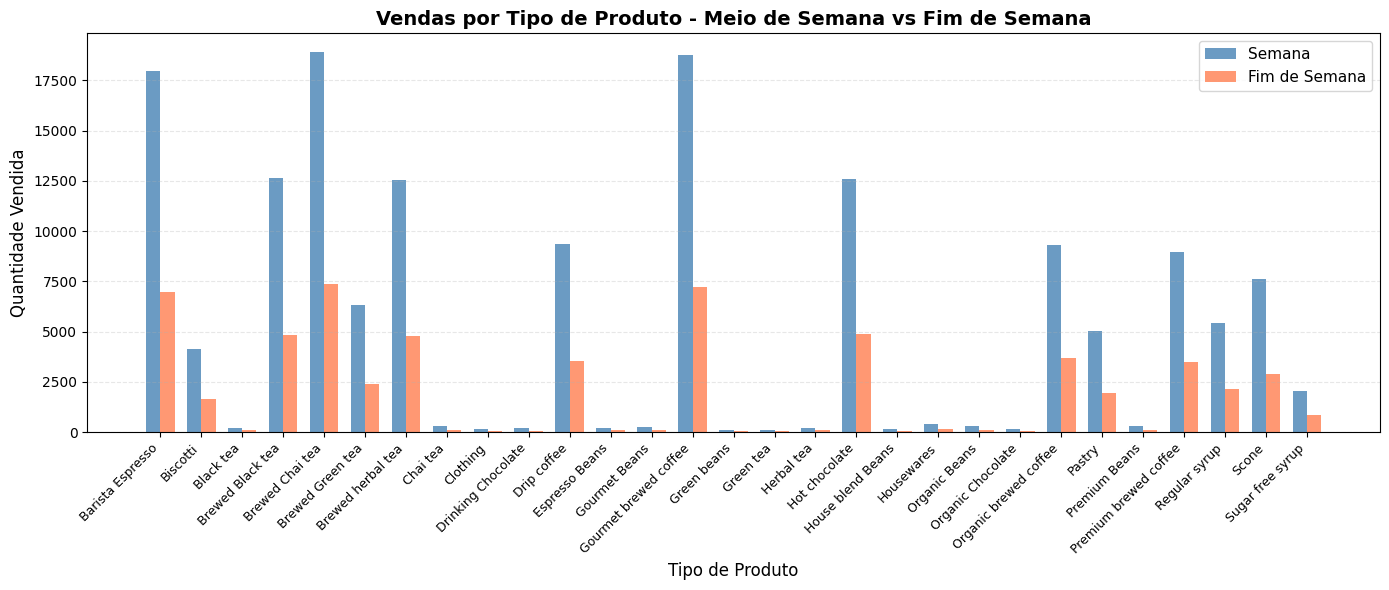

In [10]:
df["tipo_dia"] = np.where(df["weekday"] < 5, "Semana", "Fim de Semana")

week_comparison = df.groupby(["tipo_dia", "product_type"])["transaction_qty"].sum().reset_index()
top_week_comparison = week_comparison.sort_values(["tipo_dia", "transaction_qty"], ascending=[True, False])

print("\nDiferença de Consumo (Semana vs Fim de Semana):")
for t in ["Semana", "Fim de Semana"]:
    temp = top_week_comparison[top_week_comparison["tipo_dia"] == t].head(3)
    print(f"\n{t}:")
    print(temp[["product_type", "transaction_qty"]])

semana_data = week_comparison[week_comparison["tipo_dia"] == "Semana"]
fds_data = week_comparison[week_comparison["tipo_dia"] == "Fim de Semana"]

x = np.arange(len(semana_data))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, semana_data["transaction_qty"], width, label='Semana', alpha=0.8, color='steelblue')
plt.bar(x + width/2, fds_data["transaction_qty"], width, label='Fim de Semana', alpha=0.8, color='coral')

plt.title('Vendas por Tipo de Produto - Meio de Semana vs Fim de Semana', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(x, semana_data["product_type"], rotation=45, ha='right', fontsize=9)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()